<a href="https://colab.research.google.com/github/vikramkrishnan9885/MyColab/blob/master/Word2VecEmbeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WordNet - old fashioned NLP

* These approaches mainly can be categorized into two classes:
  * approaches that use external resources for representing words and 
  * approaches that do not. 
* Example of first is  WordNet — one of the most popular external resource-based approaches for representing words. 
* Then we will proceed to more localized methods (that is, those that do not rely on external resources), such as **one-hot encoding** and **Term Frequency-Inverse Document Frequency (TF-IDF)**.

## Imports

In [58]:
import nltk
nltk.download('wordnet')

from nltk.corpus import wordnet as wn

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# WordNet – using an external lexical knowledge base for learning word representations

* WordNet is one of the most popular classical approaches or statistical NLP that deals with word representations. 
* It relies on an external lexical knowledge base that encodes the information about the definition, synonyms, ancestors, descendants, and so forth of a given word.
* First, WordNet uses the term synset to denote a group or set of synonyms. 
* Next, each synset has a definition that explains what the synset represents. 
* Synonyms contained within a synset are called lemmas.
* In WordNet, the word representations are modeled hierarchically, which forms a
complex graph between a given synset and the associations to another synset.
* These associations can be of two different categories: an is-a relationship or an is-made-of relationship. 
* First, we will discuss the is-a association.
* For a given synset, there exist two categories of relations: 
  * hypernyms and 
  * hyponyms.
* Hypernyms of a synset are the synsets that carry a general (high-level) meaning of he considered synset. For example, vehicle is a hypernym of the synset car. 
* Next, hyponyms are synsets that are more specific than the corresponding synset. For example, Toyota car is a hyponym of the synset car. 
* Now let's discuss the is-made-of relationships for a synset. 
  * Holonyms of a synset are the group of synsets that represents the whole entity of the considered synset. For example, a holonym of tires is the cars synset. 
  * Meronyms are an is-made-of category and represent the opposite of holonyms, where meronyms are the parts or substances synset that makes the corresponding synset.
  

In [59]:
word = "car"
car_syns = wn.synsets(word)
car_syns

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [60]:
# The definition of the first two synsets
syns_defs = [car_syns[i].definition() for i in range(len(car_syns))]
for i in range(len(car_syns)):
    print(car_syns[i].name(),': ',syns_defs[i])

car.n.01 :  a motor vehicle with four wheels; usually propelled by an internal combustion engine
car.n.02 :  a wheeled vehicle adapted to the rails of railroad
car.n.03 :  the compartment that is suspended from an airship and that carries personnel and the cargo and the power plant
car.n.04 :  where passengers ride up and down
cable_car.n.01 :  a conveyance for passengers or freight on a cable railway


Lemmas are root forms of words. Consider the verb fly. It can be inflected into many different words—flow, flew, flies, flown, flowing, and so on—and fly is the lemma for all of these seemingly different words. Sometimes, it might be useful to reduce the tokens to their lemmas to keep the dimensionality of the vector representation low. This reduction is called lemmatization

In [61]:
for i in range(len(car_syns)):
  print(car_syns[i].name(),": ", car_syns[i].lemmas())

car.n.01 :  [Lemma('car.n.01.car'), Lemma('car.n.01.auto'), Lemma('car.n.01.automobile'), Lemma('car.n.01.machine'), Lemma('car.n.01.motorcar')]
car.n.02 :  [Lemma('car.n.02.car'), Lemma('car.n.02.railcar'), Lemma('car.n.02.railway_car'), Lemma('car.n.02.railroad_car')]
car.n.03 :  [Lemma('car.n.03.car'), Lemma('car.n.03.gondola')]
car.n.04 :  [Lemma('car.n.04.car'), Lemma('car.n.04.elevator_car')]
cable_car.n.01 :  [Lemma('cable_car.n.01.cable_car'), Lemma('cable_car.n.01.car')]


In [62]:
# Lemmas is a method
for i in range(len(car_syns[0].lemmas())):
  #print(car_syns[0].lemmas()[i])
  print(car_syns[0].lemmas()[i].name())

car
auto
automobile
machine
motorcar


In [63]:
for i in range(len(car_syns)):
  print(car_syns[i].name(),": ", car_syns[i].hypernyms())

car.n.01 :  [Synset('motor_vehicle.n.01')]
car.n.02 :  [Synset('wheeled_vehicle.n.01')]
car.n.03 :  [Synset('compartment.n.02')]
car.n.04 :  [Synset('compartment.n.02')]
cable_car.n.01 :  [Synset('compartment.n.02')]


In [64]:
# Let us get hypernyms for a Synset (general superclass)
syn = car_syns[0]
print('Hypernyms of the Synset ',syn.name())
print('\t',syn.hypernyms()[0].name())

Hypernyms of the Synset  car.n.01
	 motor_vehicle.n.01


In [65]:
for i in range(len(car_syns)):
  print(car_syns[i].name(),": ", car_syns[i].hyponyms())

car.n.01 :  [Synset('ambulance.n.01'), Synset('beach_wagon.n.01'), Synset('bus.n.04'), Synset('cab.n.03'), Synset('compact.n.03'), Synset('convertible.n.01'), Synset('coupe.n.01'), Synset('cruiser.n.01'), Synset('electric.n.01'), Synset('gas_guzzler.n.01'), Synset('hardtop.n.01'), Synset('hatchback.n.01'), Synset('horseless_carriage.n.01'), Synset('hot_rod.n.01'), Synset('jeep.n.01'), Synset('limousine.n.01'), Synset('loaner.n.02'), Synset('minicar.n.01'), Synset('minivan.n.01'), Synset('model_t.n.01'), Synset('pace_car.n.01'), Synset('racer.n.02'), Synset('roadster.n.01'), Synset('sedan.n.01'), Synset('sport_utility.n.01'), Synset('sports_car.n.01'), Synset('stanley_steamer.n.01'), Synset('stock_car.n.01'), Synset('subcompact.n.01'), Synset('touring_car.n.01'), Synset('used-car.n.01')]
car.n.02 :  [Synset('baggage_car.n.01'), Synset('cabin_car.n.01'), Synset('club_car.n.01'), Synset('freight_car.n.01'), Synset('guard's_van.n.01'), Synset('handcar.n.01'), Synset('mail_car.n.01'), Synse

In [66]:
# Let us get hyponyms for a Synset (specific subclass)
syn = car_syns[0]
print('Hyponyms of the Synset ',syn.name())
print('\t',[hypo.name() for hypo in syn.hyponyms()[:3]],'\n')

Hyponyms of the Synset  car.n.01
	 ['ambulance.n.01', 'beach_wagon.n.01', 'bus.n.04'] 



In [67]:
# Let's get part-holonyms for the third "car"
# Synset (specific subclass)
syn = car_syns[2]
print('\t',[holo.name() for holo in syn.part_holonyms()],'\n')

	 ['airship.n.01'] 



In [68]:
# Let us get meronyms for a Synset (specific subclass)
# also there is another meronym category called "substance-meronyms"
syn = car_syns[0]
print('Meronyms (Part) of the Synset ',syn.name())
print('\t',[mero.name() for mero in syn.part_meronyms()[:3]],'\n')

Meronyms (Part) of the Synset  car.n.01
	 ['accelerator.n.01', 'air_bag.n.01', 'auto_accessory.n.01'] 



In [69]:
word1, word2, word3 = 'car','lorry','tree'
w1_syns, w2_syns, w3_syns = wn.synsets(word1), wn.synsets(word2), wn.synsets(word3)

print('Word Similarity (%s)<->(%s): '%(word1,word2),wn.wup_similarity(w1_syns[0], w2_syns[0]))
print('Word Similarity (%s)<->(%s): '%(word1,word3),wn.wup_similarity(w1_syns[0], w3_syns[0]))

Word Similarity (car)<->(lorry):  0.6956521739130435
Word Similarity (car)<->(tree):  0.38095238095238093


Though WordNet is an amazing resource that anyone can use to learn meanings ofword in the NLP tasks, there are quite a few drawbacks in using WordNet for this.They are as follows:
 * Missing nuances is a key problem in WordNet. There are both theoreticaland practical reasons why this is not viable for WordNet. From a theoreticalperspective, it is not well-posed or direct to model the definition of the subtledifference between two entities. Practically speaking, defining nuances issubjective. For example, the words want and need have similar meanings, butone of them (need) is more assertive. This is considered to be a nuance.
 * Next, WordNet is subjective in itself as WordNet was designed by arelatively small community. Therefore, depending on what you are tryingto solve, WordNet might be suitable or you might be able to perform betterwith a loose definition of words.
 * There also exists the issue of maintaining WordNet, which is labor-intensive.Maintaining and adding new synsets, definitions, lemmas, and so on, can bevery expensive. This adversely affects the scalability of WordNet, as humanlabor is essential to keep WordNet up to date.
 * Developing WordNet for other languages can be costly. There are also someefforts to build WordNet for other languages and link it with the EnglishWordNet as MultiWordNet (MWN), but they are yet incomplete.

# Next, we will discuss several word representation techniques that do not rely on external resources

## One-hot encoded representation

This means that if we have a vocabulary of $V$ size, for each $i_{th}$ word $w_i$, we will represent the word $w_i$ with a $V$-long vector $[0, 0, 0, ..., 0, 1, 0, ..., 0, 0, 0]$ where the $i_{th}$ element is 1 and other elements are zero

This representation does not encode the similarity between words in any way and
completely ignores the context in which the words are used. 

This method becomes extremely ineffective for large vocabularies. 

However, one-hot encoding plays an important role even in the state-of-the-art
word embedding learning algorithms. We use one-hot encoding to represent words
numerically and feed them into neural networks so that the neural networks can
learn better and smaller numerical feature representations of the words.

## The TF-IDF method
TF-IDF is a frequency-based method that takes into account the frequency with which a word appears in a corpus. This is a word representation in the sense that it represents the importance of a specific word in a given document.

Intuitively, the higher the frequency of the word, the more important that word is in the document.

For example, in a document about cats, the word cats will appear more. However, just calculating the frequency would not work, because words such as this and is are very frequent but do not carry that much information. TF-IDF takes this into consideration and gives a value of zero for such common words. Again, TF stands for term frequency and IDF stands for inverse document frequency

## Co-occurrence matrix
Co-occurrence matrices, unlike one-hot-encoded representation, encodes the context information of words, but requires maintaining a $V \times V$ matrix

However, it is not hard to see that maintaining such a co-occurrence matrix comes at a cost as the size of the matrix grows polynomially with the size of the vocabulary. Furthermore, it is not straightforward to incorporate a context window size larger than 1. One option is to have a weighted count, where the weight for a word in the context deteriorates with the distance from the word of interest.


# Word2Vec

Word2vec is a recently-introduced distributed word representation learning technique that is currently being used as a __feature engineering technique__ for many NLP tasks (for example, machine translation, chatbots, and image caption generators).

Essentially, Word2vec learns word representations by looking at the surrounding words (that is, context) in which the word is used. More specifically, we attempt to predict the context, given some words (or vice versa), through a neural network, which leads the neural network to be forced to learn good word embeddings.

The Word2vec approach has many advantages over the previously-described methods:
* The Word2vec approach is not subjective to the human knowledge of language as in the WordNet-based approach.
* Word2vec representation vector size is independent of the vocabulary size unlike one-hot encoded representation or the word co-occurrence matrix.
*  Word2vec is a distributed representation. Unlike localist representation, where the representation depends on the activation of a single element of the representation vector (for example, one-hot encoding), the distributed representation depends on the activation pattern of all the elements in the vector. This gives more expressive power to Word2vec than produced by the one-hot encoded representation.

We will discuss two Word2vec algorithms:
*  the skip-gram and 
* Continuous Bag-of-Words (CBOW) algorithms.

## The skip-gram algorithm

### From raw text to structured data
First, we need to design a mechanism to extract a dataset that can be fed to our learning model. Such a dataset should be a set of tuples of the format (input, output). 

The data preparation process should do the following:
* Capture the surrounding words of a given word
* Perform in an unsupervised manner

Once the data is in the (input, output) format, we can use a neural network to learn the word embeddings. First, let's identify the variables we need to learn the word embeddings. To store the word embeddings, we need a $V \times D$ matrix, where $V$ is the vocabulary size and $D$ is the dimensionality of the word embeddings (that is, the number of elements in the vector that represents a single word). 

D is a user-defined hyperparameter. The higher D is, the more expressive the word embeddings learned will be. This matrix will be referred to as the embedding space or the embedding layer.

Next, we have a softmax layer with weights of size $D \times V$, a bias of size V. 

Each word will be represented as a one-hot encoded vector of size $V$ with one
element being 1 and all the others being 0. Therefore, an input word and the
corresponding output words would each be of size $V$. 

Let's refer to the $i_{th}$ input as $x_i$, the corresponding embedding of $x_i$ as $z_i$, and the corresponding output as $y_i$.

At this point, we have the necessary variables defined. 

Next, for each input $x_i$, we will look up the embedding vectors from the embedding layer corresponding to the input. This operation provides us with $z_i$, which is a $D$-sized vector (that is, a D-long embedding vector). Afterwards, we calculate the prediction output for $x_i$ using the
following transformation:
$$
\text{logit}(x_i) = z_i W+b
$$
$$
\hat{y}_i= \text{softmax}(\text{logit}(x_i))
$$

### Loss func
The objective of this loss function from a practical perspective, we want to maximize the probability of predicting a contextual word given a word, while minimizing the probability of "all" the noncontextual words, given a word. 

#### Efficiently approximating the loss function
If we try to calculate the loss function in closed form, we will face an inevitable tremendous slowness of our algorithm.

We will discuss two popular choices of approximations:
* Negative sampling
* Hierarchical softmax


 __Negative sampling of the softmax layer__

Here we will discuss our first approach: negative sampling the softmax layer.
Negative sampling is an approximation of the Noise-Contrastive Estimation (NCE)
method. NCE says that a good model should differentiate data from noise by means
of logistic regression.

__Hierarchical softmax__

Hierarchical softmax is slightly more complex than negative sampling, but serves the same objective as the negative sampling; that is, approximating the softmax without having to calculate activations for all the words in the vocabulary for all the training samples. 

However, unlike negative sampling, hierarchical softmax uses only the actual data and does not need noise samples

_Learning the hierarchy_

Though hierarchical softmax is efficient, an important question remains unanswered.
How do we determine the decomposition of the tree? More precisely, which word will follow which branch? There are a few options to achieve this:

* __Initialize the hierarchy randomly__: This method does have some performance degradations as the random placement cannot be guaranteed to have the best branching possible among words.
* __Use WordNet to determine the hierarchy__: WordNet can be utilized to determine a suitable order for the words in the tree. This method has shown to perform significantly better than the random initialization.

### Code

#### Data Preproc

In [70]:
import os
import urllib
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [71]:
# DOWNLOAD DATA

def download_data(url, filename):
  if not os.path.exists(filename):
    print('Downloading file:','\t',url)
    filename, _ = urllib.request.urlretrieve(url,filename)
  else:
    raise Exception("FILE ALREADY EXISTS!")
  return filename

In [72]:
# https://www.evanjones.ca/software/wikipedia2text-extracted.txt.bz2 is giving 404
# https://github.com/amolnayak311/nlp-with-tensorflow/blob/master/wikipedia2text-extracted.txt.bz2?raw=true is used instead

url = 'https://github.com/amolnayak311/nlp-with-tensorflow/blob/master/wikipedia2text-extracted.txt.bz2?raw=true'
filename = 'wikipedia2text-extracted.txt.bz2'
filename = download_data(url,filename)

Exception: ignored

In [ ]:
import bz2
import math

In [ ]:
# READ DATA WITH PREPROCESSING WITH NLTK
#
# Reads data as it is to a string, 
# convert to lower-case and 
# tokenize it using the nltk library. 
#
# This code reads data in 1MB portions as processing the full text at once 
# slows down the task and returns a list of words. 
# You will have to download the necessary tokenizer.

def read_data(filename):
  """
  Extract the first file enclosed in a zip file as a list of words
  and pre-processes it using the nltk python library
  """

  with bz2.BZ2File(filename) as f:

    data = []

    file_size = os.stat(filename).st_size
    # reading 1 MB at a time as the dataset is moderately large
    chunk_size = 1024 * 1024 
    print('Reading data...')
    
    for i in range(math.ceil(file_size//chunk_size)+1):
      bytes_to_read = min(chunk_size,file_size-(i*chunk_size))
      file_string = f.read(bytes_to_read).decode('utf-8')
      file_string = file_string.lower()
      
      # tokenizes a string to words residing in a list
      file_string = nltk.word_tokenize(file_string)
      data.extend(file_string)
  return data

In [ ]:
words = read_data(filename)
print('Data size %d' % len(words))
print('Example words (start): ',words[:10])
print('Example words (end): ',words[-10:])

#### Building the Dictionaries

Builds the following. To understand each of these elements, let us also assume the text "I like to go to school"
* dictionary: maps a string word to an ID (e.g. {I:0, like:1, to:2, go:3, school:4})
* reverse_dictionary: maps an ID to a string word (e.g. {0:I, 1:like, 2:to, 3:go, 4:school}
* count: List of list of (word, frequency) elements (e.g. [(I,1),(like,1),(to,2),(go,1),(school,1)]
* data : Contain the string of text we read, where string words are replaced with word IDs (e.g. [0, 1, 2, 3, 2, 4])

It also introduces an additional special token UNK to denote rare words to are too rare to make use of.

In [ ]:
import collections

In [ ]:
# we restrict our vocabulary size to 50000
vocabulary_size = 50000 

def build_dataset(words):
  count = [['UNK', -1]]
  # Gets only the vocabulary_size most common words as the vocabulary
  # All the other words will be replaced with UNK token
  count.extend(collections.Counter(words).most_common(vocabulary_size - 1))
  dictionary = dict()

  # Create an ID for each word by giving the current length of the dictionary
  # And adding that item to the dictionary
  for word, _ in count:
    dictionary[word] = len(dictionary)
    
  data = list()
  unk_count = 0
  # Traverse through all the text we have and produce a list
  # where each element corresponds to the ID of the word found at that index
  for word in words:
    # If word is in the dictionary use the word ID,
    # else use the ID of the special token "UNK"
    if word in dictionary:
      index = dictionary[word]
    else:
      index = 0  # dictionary['UNK']
      unk_count = unk_count + 1
    data.append(index)
    
  # update the count variable with the number of UNK occurences
  count[0][1] = unk_count

  reverse_dictionary = dict(zip(dictionary.values(), dictionary.keys())) 
  # Make sure the dictionary is of size of the vocabulary
  assert len(dictionary) == vocabulary_size
    
  return data, count, dictionary, reverse_dictionary

In [ ]:
data, count, dictionary, reverse_dictionary = build_dataset(words)
print('Most common words (+UNK)', count[:5])
print('Sample data', data[:10])

#### Generating Batches of Data for Skip-Gram
Generates a batch or target words (batch) and a batch of corresponding context words (labels). 

It reads `2*window_size+1` words at a time (called a span) and create `2*window_size` datapoints in a single span. 

The function continue in this manner until batch_size datapoints are created. 

Everytime we reach the end of the word sequence, we start from beginning.

In [ ]:
import numpy as np

In [ ]:
data_index = 0

def generate_batch_skip_gram(batch_size, window_size):
  # data_index is updated by 1 everytime we read a data point
  global data_index 
    
  # two numpy arras to hold target words (batch)
  # and context words (labels)
  batch = np.ndarray(shape=(batch_size), dtype=np.int32)
  labels = np.ndarray(shape=(batch_size, 1), dtype=np.int32)
    
  # span defines the total window size, where
  # data we consider at an instance looks as follows. 
  # [ skip_window target skip_window ]
  span = 2 * window_size + 1 
    
  # The buffer holds the data contained within the span
  buffer = collections.deque(maxlen=span)
  
  # Fill the buffer and update the data_index
  for _ in range(span):
    buffer.append(data[data_index])
    data_index = (data_index + 1) % len(data)
  
  # This is the number of context words we sample for a single target word
  num_samples = 2*window_size 

  # We break the batch reading into two for loops
  # The inner for loop fills in the batch and labels with 
  # num_samples data points using data contained withing the span
  # The outper for loop repeat this for batch_size//num_samples times
  # to produce a full batch
  for i in range(batch_size // num_samples):
    k=0
    # avoid the target word itself as a prediction
    # fill in batch and label numpy arrays
    for j in list(range(window_size))+list(range(window_size+1,2*window_size+1)):
      batch[i * num_samples + k] = buffer[window_size]
      labels[i * num_samples + k, 0] = buffer[j]
      k += 1 
    
    # Everytime we read num_samples data points,
    # we have created the maximum number of datapoints possible
    # withing a single span, so we need to move the span by 1
    # to create a fresh new span
    buffer.append(data[data_index])
    data_index = (data_index + 1) % len(data)
  return batch, labels

In [ ]:
print('data:', [reverse_dictionary[di] for di in data[:8]])

for window_size in [1, 2]:
    data_index = 0
    batch, labels = generate_batch_skip_gram(batch_size=8, window_size=window_size)
    print('\n','with window_size = %d:' %window_size)
    print('\t', 'batch:', [reverse_dictionary[bi] for bi in batch])
    print('\t','labels:', [reverse_dictionary[li] for li in labels.reshape(8)])

#### Defining Hyperparameters
* `batch_size` (amount of samples in a single batch) 
* `embedding_size` (size of embedding vectors) 
* `window_size` (context window size).

In [ ]:
import random

In [73]:
batch_size = 128 # Data points in a single batch
embedding_size = 128 # Dimension of the embedding vector.
window_size = 4 # How many words to consider left and right.

# We pick a random validation set to sample nearest neighbors
valid_size = 16 # Random set of words to evaluate similarity on.
# We sample valid datapoints randomly from a large window without always being deterministic
valid_window = 50

# When selecting valid examples, we select some of the most frequent words as well as
# some moderately rare words as well
valid_examples = np.array(random.sample(range(valid_window), valid_size))
valid_examples = np.append(valid_examples,random.sample(range(1000, 1000+valid_window), valid_size),axis=0)

num_sampled = 32 # Number of negative examples to sample.

In [83]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


In [84]:
# DEFINING INPUTS AND OUTPUTS

tf.reset_default_graph()

# Training input data (target word IDs).
train_dataset = tf.placeholder(tf.int32, shape=[batch_size])
# Training input label data (context word IDs)
train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1])
# Validation input data, we don't need a placeholder
# as we have already defined the IDs of the words selected
# as validation data
valid_dataset = tf.constant(valid_examples, dtype=tf.int32)

In [85]:
# DEFINING MODEL PARAMETERS AND OTHER VARIABLES

# Variables

# Embedding layer, contains the word embeddings
embeddings = tf.Variable(tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0))

# Softmax Weights and Biases
softmax_weights = tf.Variable(
    tf.truncated_normal([vocabulary_size, embedding_size],
                        stddev=0.5 / math.sqrt(embedding_size))
)
softmax_biases = tf.Variable(tf.random_uniform([vocabulary_size],0.0,0.01))

In [86]:
# DEFINING MODEL COMPUTATIONS

# Model.
# Look up embeddings for a batch of inputs.
embed = tf.nn.embedding_lookup(embeddings, train_dataset)

# Compute the softmax loss, using a sample of the negative labels each time.
loss = tf.reduce_mean(
    tf.nn.sampled_softmax_loss(
        weights=softmax_weights, biases=softmax_biases, inputs=embed,
        labels=train_labels, num_sampled=num_sampled, num_classes=vocabulary_size)
)

In [87]:
# Calculating Word Similarities
# We calculate the similarity between two given words in terms of the cosine distance. 
# To do this efficiently we use matrix operations to do so, as shown below.

# Compute the similarity between minibatch examples and all embeddings.
# We use the cosine distance:
norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), 1, keepdims=True))
normalized_embeddings = embeddings / norm
valid_embeddings = tf.nn.embedding_lookup(
normalized_embeddings, valid_dataset)
similarity = tf.matmul(valid_embeddings, tf.transpose(normalized_embeddings))

In [88]:
# We then define a constant learning rate and an optimizer which uses the Adagrad method.

optimizer = tf.train.AdagradOptimizer(1.0).minimize(loss)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [89]:
# Running the Skip-Gram Algorithm

num_steps = 100001
skip_losses = []
# ConfigProto is a way of providing various configuration settings 
# required to execute the graph
with tf.Session(config=tf.ConfigProto(allow_soft_placement=True)) as session:
  # Initialize the variables in the graph
  tf.global_variables_initializer().run()
  print('Initialized')
  average_loss = 0
  
  # Train the Word2vec model for num_step iterations
  for step in range(num_steps):
    
    # Generate a single batch of data
    batch_data, batch_labels = generate_batch_skip_gram(
      batch_size, window_size)
    
    # Populate the feed_dict and run the optimizer (minimize loss)
    # and compute the loss
    feed_dict = {train_dataset : batch_data, train_labels : batch_labels}
    _, l = session.run([optimizer, loss], feed_dict=feed_dict)
    
    # Update the average loss variable
    average_loss += l
    
    if (step+1) % 2000 == 0:
      if step > 0:
        average_loss = average_loss / 2000
      
      skip_losses.append(average_loss)
      # The average loss is an estimate of the loss over the last 2000 batches.
      print('Average loss at step %d: %f' % (step+1, average_loss))
      average_loss = 0
    
    # Evaluating validation set word similarities
    if (step+1) % 10000 == 0:
      sim = similarity.eval()
      # Here we compute the top_k closest words for a given validation word
      # in terms of the cosine distance
      # We do this for all the words in the validation set
      # Note: This is an expensive step
      for i in range(valid_size):
        valid_word = reverse_dictionary[valid_examples[i]]
        top_k = 8 # number of nearest neighbors
        nearest = (-sim[i, :]).argsort()[1:top_k+1]
        log = 'Nearest to %s:' % valid_word
        for k in range(top_k):
          close_word = reverse_dictionary[nearest[k]]
          log = '%s %s,' % (log, close_word)
        print(log)
  skip_gram_final_embeddings = normalized_embeddings.eval()



Initialized
Average loss at step 2000: 3.988645
Average loss at step 4000: 3.630392
Average loss at step 6000: 3.584901
Average loss at step 8000: 3.512257
Average loss at step 10000: 3.498812
Nearest to also: tipu, harvester, sauropods, ownership, helm, graekos, listing, polyalphabetic,
Nearest to not: weapon, benioff, berne, penultimate, darkened, underway, teng-hui, misgivings,
Nearest to UNK: ), (, and, broadcast, ,, congenital, november, sassou,
Nearest to most: sparred, orfeo, imams, tōjō, sake, 1925., noonan, high-technology,
Nearest to first: inflated, spawns, 25, patriotic, frightened, wellesley, friction, portman,
Nearest to the: ,, a, ., and, etc., diodorus, shapiro, in,
Nearest to of: in, softness, assistant, gnosticism, ali, ., re-education, kamboni,
Nearest to that: fayette, endeavours, multi-dimensional, roast, cello, abjuration, mating, terveet,
Nearest to its: nathaniel, colleges, crowther, austin, shiva, balboa, botticelli, petro,
Nearest to was: is, lehman, encke, we

NameError: ignored

In [90]:
import csv

In [91]:
# We will save the word vectors learned and the loss over time
# as this information is required later for comparisons
np.save('skip_embeddings',skip_gram_final_embeddings)

with open('skip_losses.csv', 'wt') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(skip_losses)

### Visualizing results

In [92]:
# Finding Only the Words Clustered Together Instead of Sparsely Distributed Words

def find_clustered_embeddings(embeddings,distance_threshold,sample_threshold):
    ''' 
    Find only the closely clustered embeddings. 
    This gets rid of more sparsly distributed word embeddings and make the visualization clearer
    This is useful for t-SNE visualization
    
    distance_threshold: maximum distance between two points to qualify as neighbors
    sample_threshold: number of neighbors required to be considered a cluster
    '''
    
    # calculate cosine similarity
    cosine_sim = np.dot(embeddings,np.transpose(embeddings))
    norm = np.dot(np.sum(embeddings**2,axis=1).reshape(-1,1),np.sum(np.transpose(embeddings)**2,axis=0).reshape(1,-1))
    assert cosine_sim.shape == norm.shape
    cosine_sim /= norm
    
    # make all the diagonal entries zero otherwise this will be picked as highest
    np.fill_diagonal(cosine_sim, -1.0)
    
    argmax_cos_sim = np.argmax(cosine_sim, axis=1)
    mod_cos_sim = cosine_sim
    # find the maximums in a loop to count if there are more than n items above threshold
    for _ in range(sample_threshold-1):
        argmax_cos_sim = np.argmax(cosine_sim, axis=1)
        mod_cos_sim[np.arange(mod_cos_sim.shape[0]),argmax_cos_sim] = -1
    
    max_cosine_sim = np.max(mod_cos_sim,axis=1)

    return np.where(max_cosine_sim>distance_threshold)[0]

In [106]:
import sklearn
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [97]:
# Computing the t-SNE Visualization of Word Embeddings Using Scikit-Learn

num_points = 1000 # we will use a large sample space to build the T-SNE manifold and then prune it using cosine similarity

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)

print('Fitting embeddings to T-SNE. This can take some time ...')
# get the T-SNE manifold
selected_embeddings = skip_gram_final_embeddings[:num_points, :]
two_d_embeddings = tsne.fit_transform(selected_embeddings)

print('Pruning the T-SNE embeddings')
# prune the embeddings by getting ones only more than n-many sample above the similarity threshold
# this unclutters the visualization
selected_ids = find_clustered_embeddings(selected_embeddings,.25,10)
two_d_embeddings = two_d_embeddings[selected_ids,:]

print('Out of ',num_points,' samples, ', selected_ids.shape[0],' samples were selected by pruning')

Fitting embeddings to T-SNE. This can take some time ...
Pruning the T-SNE embeddings
Out of  1000  samples,  367  samples were selected by pruning


In [103]:
from matplotlib import pylab
import matplotlib.pyplot as plt

In [104]:
def plot(embeddings, labels):

  n_clusters = 20 # number of clusters
  # automatically build a discrete set of colors, each for cluster
  label_colors = [plt.cm.Spectral(float(i) /n_clusters) for i in range(n_clusters)]
  
  assert embeddings.shape[0] >= len(labels), 'More labels than embeddings'
  
  # Define K-Means
  kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=0).fit(embeddings)
  kmeans_labels = kmeans.labels_
  
  pylab.figure(figsize=(15,15))  # in inches
    
  # plot all the embeddings and their corresponding words
  for i, (label,klabel) in enumerate(zip(labels,kmeans_labels)):
    x, y = embeddings[i,:]
    pylab.scatter(x, y, c=label_colors[klabel])    
        
    pylab.annotate(
        label, 
        xy=(x, y), 
        xytext=(5, 2), 
        textcoords='offset points',
        ha='right', 
        va='bottom',
        fontsize=10
    )


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

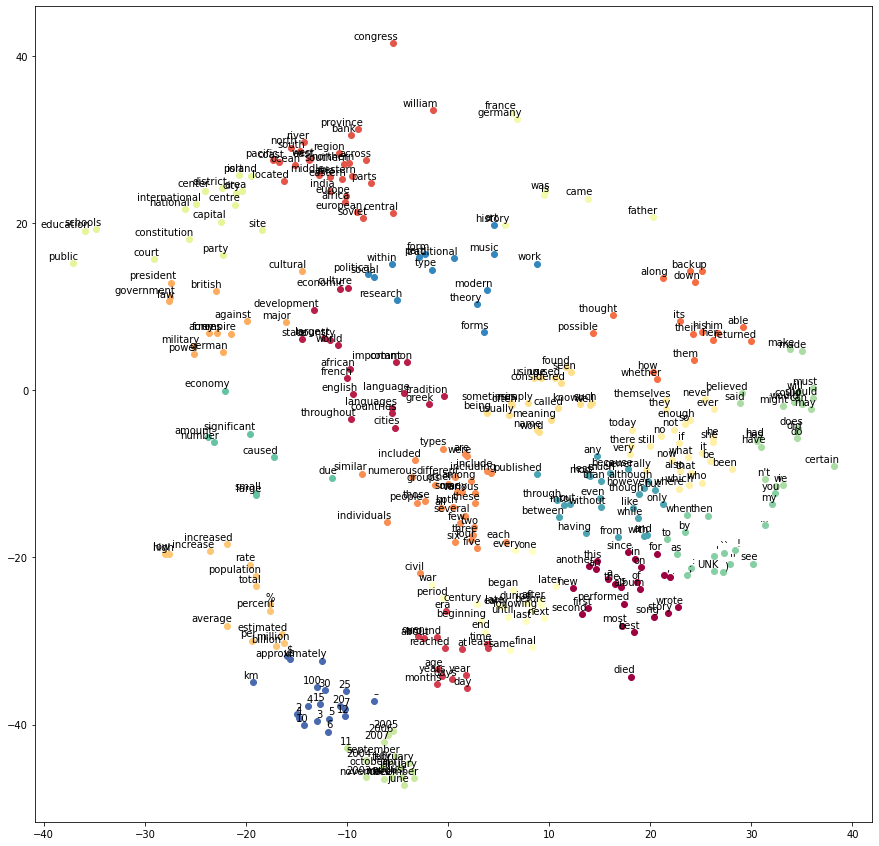

In [107]:
words = [reverse_dictionary[i] for i in selected_ids]
plot(two_d_embeddings, words)